# <a id = 'content'></a> Calculator for Tensors in General Relativity | MATH0025

Author: Bohdan Glisevic (20123476)

In this Jupyter notebook, we have developed a code that can assist in the computation of tensors and other mathematical operators commonly used in the theory of general relativity. The calculations are accompanied by brief theoretical explanations, focused on the calculation of relevant formulas, and also provide some qualitative explanations. Simplified models with diagonal metrics are often used in general relativity, which leads to most tensors having trivial components. However, several identities can be used to find non-zero components, but it can be challenging to check one's work due to the complexity of index placement. This notebook was created with the purpose of allowing users to verify their results and practice their methods. While it may not be sufficient for examination purposes, it can serve as a useful tool for revision and the development of skills in the field. Ultimately, the process of calculations is more important than the final result, and this notebook can aid in the revision and further refinement of these skills.

This notebook contains calcualtors for:
- Metric tensor
- Christoffel symbols
- Riemann tensor
- Ricci tensor
- Ricci scalar
- Einstein tensor
- [Example (3-sphere) (GO TO THIS SECTION IF YOU JUST WANT TO USE YOUR METRIC TENSOR)](#Example)
- Jacobian matrix

## Libraries

The SymPy library is the primary library used throughout the notebook. It is employed for symbolic equations where variables are defined using strings, rather than integer or float values. SymPy is an advantageous tool, as it includes many commonly used functions and can simplify equations. It shares similarities with Wolfram Mathematica, which we initially wanted to use, but since it requires a paid subscription, we opted for SymPy since students are generally more familiar with Python.

We faced some problems with printing $\LaTeX$ equations using SymPy, but fortunately, IPython offers tools for printing in markdown formatting. Finally, we have specifically called certain functions from SymPy individually to make the notebook more user-friendly. Although we initially planned to write the equations in $\LaTeX$ script, we encountered some issues with Jupyter. Nonetheless, writing the equations should still be relatively straightforward.

<div class="alert alert-danger">
    
You might need to first install SymPy library. If so, uncomment the cell below. After the library is installed, don't forget to restart your kernel. 

In [1]:
# pip install sympy                  # install sympy

In [2]:
import sympy as sp                           # symbolic equations in Python                
from IPython.display import Markdown         # printing in markdown style
from sympy import symbols, Matrix, diff, simplify, nsimplify, sin, cos, tan, cosh, sinh, sech, exp, init_printing, Function

init_printing()

## Metric Tensor

o use the calculator, we first need to specify certain properties of the space we will be working with. Our initial step is to define a metric tensor $g_{\mu \nu}$ that describes the space. To achieve this, we require a coordinate system $X^{i}$ and the equation of an infinitesimal line element $\text{d}s$. To simplify our explanation, we will use a concrete example of a 2-sphere (a 2D surface of a 3D sphere). The coordinate system we will use is $X^i = { X^1, X^2 }$, where we could define $X^1 = \theta$ and $X^2 = \phi$. However, we will adhere to the $X^i$ notation as it is more general, and we may require a change of metric for different spaces. The line element for a 2-sphere is

\begin{align*}
    \text{d}s^2 &= r^2 \text{d} \theta ^{2} + r^2 \sin^2 \theta \text{d} \phi^{2} \\
    \text{d}s^2 &= r^2 \left(\text{d} X^{1} \right)^{2} + r^2 \sin^2 \left( X^{1} \right) \left(\text{d} X^{1} \right)^{2}
\end{align*}

By using the knowledge of coordinate system and the line element, we can find the metric tensor as

\begin{equation*}
g_{\mu \nu} = 
\begin{bmatrix}
    r^2 & 0 \\
    0   & r^2 \sin^2 \theta
\end{bmatrix}
\end{equation*}

or in general form

\begin{equation*}
g_{\mu \nu} = 
\begin{bmatrix}
    r^2 & 0 \\
    0   & r^2 \sin^2 \left( X^1 \right)
\end{bmatrix}
\end{equation*}

Notice, that in our coordinate system, $r$ is just a constant. It is not part of the $X^i$. Finally, we can move on to the coding part. To make this notebook as clear as possible, we wil enumarate the steps.

1. Define number `dim` of dimensions of the metric tensor. In case of 2-sphere, we have only 2 dimnesions as there are only two coordinates in the coordinate system.

2. By defining `dim`, we have automatically obtained symbols for $X^i$, denoted simply as `X`. There may be additional symbols that need to be defined in the metric, such as $r$ in the case of a 2-sphere. Although this symbol is not a coordinate, it is necessary to define it so that SymPy can understand it. At times, it may be necessary to define more constant symbols, such as `R, r = symbols('R r')` in the case of a 2-torus. Define all the symbols you require. In certain cases, we may need to define a function of the coordinate, such as $A(r)$ in the Schwarzschild metric. In such cases, we use the `Function` function to define the associated symbol and specify the independent variable (coordinate). SymPy can then differentiate such a function in its general form.

In [3]:
## Define the dimensionality of the coordinate systems ##
dim = 2

## Define symbols ##
X = symbols(' '.join([fr'X^{i+1}' for i in range(dim)]))          # coordinate system
r = symbols('r')                                                  # symbols of constants in the metric tensor
# F = Function('F')(X[1])                                         # symbols of functions (e.g. F(X^1))

3. We need to define the components of the metric tensor, which is one of the most challenging parts. Any coordinates used in the expression inside the metric tensor must be in agreement with the notation (see the notation subsection below). The inverse of the metric tensor is then calculated automatically.

**Notation**

Previously, we mentioned that we encountered some issues with using $\LaTeX$ notation. Instead, we will use a notation that is similar to the standard NumPy notation for writing equations, as SymPy is very similar to NumPy in this regard. Let us consider the $g_{22}$ component of the metric tensor as an example, which is given by:

$r^2 \sin^2 \left(X^1 \right)$ = `r**2 * sin(X[0])**2`

Note that in SymPy, we use `**` for exponentiation instead of `^`, which is used in many other programming languages. Additionally, the `sin()` function can be used directly since we have imported it from the SymPy library in the first code cell. However, if we had not imported it individually, we would need to use the prefix `sp` before calling the function, like this: `sp.sin()`.

If we need to use other functions that are not imported individually, we can still use them by calling the function with the `sp.` prefix. For example, the square root function would be written as `sp.sqrt()`. See the example below for how to use the square root function:

$r^2 \sqrt{X^1}$ = `r**2 * sp.sqrt(X[0])`

Note that while the first coordinate is denoted as $X^1$ in the $\LaTeX$ equation, in SymPy notation, it is written as `X[0]`. This is because Python indexing starts at 0. Although the $\LaTeX$ output of our printing functions will always use the notation where the first coordinate is written with superscript 1, the SymPy equations will need to be shifted by -1 instead.

In [4]:
## Metric & Inverse Metric Tensors ##
g     = Matrix([[r**2, 0],                                          # metric tensor
               [0,    r**2 * sin(X[0])**2]])        

g_inv = g.inv()                                                     # inverse metric tensor

Let define a new function `print_Metric()` that prints components of the metric tensor individually. This is not as useful now, but for much larger tensors, it is more convinient to write components individually and see which ones are trivial. 

In [5]:
def print_Metric(simple = True):
    '''
    This function prints components of the metric tensor.
    Inputs:
        simple - this input is Boolean and can simplify the output to as compact form as possible
    Outputs:
        NONE
    Assumptions:
        - SymPy library was called
        - Individual partof of SymPy were called: simplify, nsimplify
        - IPython.display was called
    '''
    ## Front part of the LaTeX align string ##
    string = ''
    frontstring = '\\begin{align*} \n'
    string += frontstring
    
    ## Equations for tensor components ##
    for mu in range(dim):
        for nu in range(dim):
            subscript   = str(int(str(mu+1) + str(nu+1)))
            if simple == True:
                string += fr'g' + r'_{' + f'{subscript}' + r'} =& \:' + sp.latex(simplify(nsimplify(g[mu,nu]))) + '\\\\ \n'
            else:
                string += fr'g' + r'_{' + f'{subscript}' + r'} =& \:' + sp.latex(nsimplify(g[mu,nu])) + '\\\\ \n'
                
    ## Back part of the LaTeX align string ##
    backstring = '\\end{align*}'
    string += backstring
    
    ## Display equations as LaTeX in markdown ##
    display(Markdown(string))
    return

In the cell below, you can run the `print_Metric()` function to see individual components of the metric tensor.

In [6]:
print_Metric()

\begin{align*} 
g_{11} =& \:r^{2}\\ 
g_{12} =& \:0\\ 
g_{21} =& \:0\\ 
g_{22} =& \:r^{2} \sin^{2}{\left(X^{1} \right)}\\ 
\end{align*}

It is also useful to just print the whole metric tensor to check the validity of our process.

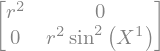

In [7]:
g

Printing the inverse of the metric tensor can provide insight into the complexity of the metric. In the case of a diagonal metric, the non-zero components of the inverse are simply the inverses of the non-zero components of the metric tensor. However, for a more complicated metric, the inverse can also be more complex.

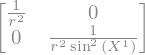

In [8]:
g_inv

## Christoffel Symbols

Although Christoffel symbols bear some resemblance to tensors, they are not tensors. Nonetheless, it is still useful to have a calculator for them. Before introducing the equation for calculating Christoffel symbols, we need to define the notation for differentiation. We will use $\partial_k \equiv \frac{\partial}{\partial X^k}$ to denote differentiation with respect to the coordinate $X^k$. With this notation, we can write the formula for Christoffel symbols as:

\begin{equation*}
\Gamma_{\alpha \beta}^{\gamma} = \frac{1}{2} g^{\gamma s} \left( \partial_{\beta} g_{s \alpha} + \partial_{\alpha} g_{s \beta} - \partial_{s} g_{\alpha \beta} \right) 
\end{equation*}

In [9]:
## Convert coordinates from tuple to list ##
X_array = []
for i in range(dim):
    X_array.append(X[i])
    
## Define a fucntion that caluclates Christoffel symbols ##
def Christoffel(gamma, alpha, beta):
    '''
    This function calcualtes symbolicallly equation for a specific Christoffel symbol.
    Inputs:
        gamma - value of the index (between 1 and dim) [integer]
        alpha - value of the index (between 1 and dim) [integer]
        beta  - value of the index (between 1 and dim) [integer]
    Outputs:
        Christoffel - SymPy equation for a specific Christoffel symbol
    Assumptions:
        - SymPy library was called
        - Individual partof of SymPy were called: diff
    '''
    Christoffel = 0
    for s in range(dim):
        Christoffel += 0.5 * g_inv[gamma,s] * (diff(g[beta,s], X_array[alpha]) + diff(g[alpha,s], X_array[beta]) - diff(g[alpha,beta], X_array[s]))
    return Christoffel

In [10]:
def print_Christoffel(simple = True):
    '''
    This functions prints Christoffel symbols.
    Inputs:
        simple - this input is Boolean and can simplify the output to as compact form as possible
    Outputs:
        NONE
    Assumptions:
        - SymPy library was called
        - Individual partof of SymPy were called: simplify, nsimplify
        - IPython.display was called
        - Christoffel function exists
    '''
    ## Front part of the LaTeX align string ##
    string = ''
    frontstring = '\\begin{align*} \n'
    string += frontstring
    
    ## Equations for the symbols ##
    for gamma in range(dim):
        for alpha in range(dim):
            for beta in range(dim):
                alphabeta = str(int(str(alpha+1) + str(beta+1)))
                if simple == True:
                    string += fr'\Gamma^{gamma+1}' + r'_{' + f'{alphabeta}' + r'} =& \:' + sp.latex(simplify(nsimplify(Christoffel(gamma, alpha, beta)))) + '\\\\ \n'
                else:
                    string += fr'\Gamma^{gamma+1}' + r'_{' + f'{alphabeta}' + r'} =& \:' + sp.latex(nsimplify(Christoffel(gamma, alpha, beta))) + '\\\\ \n'
    
    ## Back part of the LaTeX align string ##
    backstring = '\\end{align*}'
    string += backstring
    
    ## Display equations as LaTeX in markdown ##
    display(Markdown(string))
    return

In [11]:
print_Christoffel()

\begin{align*} 
\Gamma^1_{11} =& \:0\\ 
\Gamma^1_{12} =& \:0\\ 
\Gamma^1_{21} =& \:0\\ 
\Gamma^1_{22} =& \:- \frac{\sin{\left(2 X^{1} \right)}}{2}\\ 
\Gamma^2_{11} =& \:0\\ 
\Gamma^2_{12} =& \:\frac{1}{\tan{\left(X^{1} \right)}}\\ 
\Gamma^2_{21} =& \:\frac{1}{\tan{\left(X^{1} \right)}}\\ 
\Gamma^2_{22} =& \:0\\ 
\end{align*}

## Riemann Tensor

We now come to the most useful part of this notebook, which is the calculation of Riemann (curvature) tensor components. While there are ways to find non-zero components for diagonal metric tensors, it is also important to have equations for the non-trivial components to check your work. For a 4-dimensional metric, there are 256 components of the Riemann tensor. This calculator can calculate all of them. We only test it on the 2D metric of the 2-sphere, but I encourage you to define metric tensors with higher dimensions and see the values you get. The Riemann tensor can be expressed by the equation below (note that we use the notation $\partial_k$ as before).

\begin{equation*}
R_{\beta \mu \nu}^{\alpha} = \partial_{\mu} \Gamma_{\beta \nu}^{\alpha} - \partial_{\nu} \Gamma_{\beta \mu}^{\alpha} + \Gamma_{\beta \nu}^{s} \Gamma_{s \mu}^{\alpha} - \Gamma_{\beta \mu}^{s} \Gamma_{s \nu}^{\alpha}
\end{equation*}

Once again, we use $s$ as a summation index in Einstein notation. It should be noted that we use the Riemann curvature tensor of the second kind. It is also possible to use the Riemann tensor of the first kind, which would be denoted as $R_{\alpha \beta \mu \nu}$. To calculate it, we would need to apply the metric tensor, such as $g_{\alpha s} R_{\beta \mu \nu}^{s} = R_{\alpha \beta \mu \nu}$. Adding this feature to the notebook would be a potential improvement, and if there is enough demand for it, I will create a calculator for the Christoffel symbols of the first kind as well. Additionally, we could also calculate the dual Riemann curvature tensor, but for now, we will not consider it.

In [12]:
def Riemann(alpha, beta, mu, nu):
    '''
    This function calculates symbolically equation for components of Riemann curvature tensor.
    Inputs:
        alpha - value of the index (between 1 and dim) [integer]
        beta  - value of the index (between 1 and dim) [integer]
        mu    - value of the index (between 1 and dim) [integer]
        nu    - value of the index (between 1 and dim) [integer]
    Outputs:
        Riemann - SymPy equation for a specific component of Riemann curvature tensor
    Assumptions:
        - SymPy library was called
        - Individual partof of SymPy were called: diff
        - Christoffel function is defined
    '''
    Riemann = 0
    Riemann = diff(Christoffel(alpha, nu, beta), X_array[mu]) - diff(Christoffel(alpha, mu, beta), X_array[nu])
    for s in range(dim):
         Riemann += Christoffel(s,nu,beta) * Christoffel(alpha,mu,s) - Christoffel(s,mu,beta) * Christoffel(alpha,nu,s)
    return Riemann

In [13]:
def print_Riemann(simple = True):
    '''
    This functions prints all components of Riemann tensor.
    Inputs:
        simple - this input is Boolean and can simplify the output to as compact form as possible
    Outputs:
        NONE
    Assumptions:
        - SymPy library was called
        - Individual partof of SymPy were called: simplify, nsimplify
        - IPython.display was called
        - Riemann function exists
    '''
    ## Front part of the LaTeX align string ##
    string = ''
    frontstring = '\\begin{align*} \n'
    string += frontstring
    
    ## Equations for the components ##
    for alpha in range(dim):
        for beta in range(dim):
            for mu in range(dim):
                for nu in range(dim):
                    subscript   = str(int(str(beta+1) + str(mu+1) + str(nu+1)))
                    superscript = alpha + 1
                    if simple == True:
                        string += fr'R^{superscript}' + r'_{' + f'{subscript}' + r'} =& \:' + sp.latex(simplify(nsimplify(Riemann(alpha, beta, mu, nu)))) + '\\\\ \n'
                    else:
                        string += fr'R^{superscript}' + r'_{' + f'{subscript}' + r'} =& \:' + sp.latex(nsimplify(Riemann(alpha, beta, mu, nu))) + '\\\\ \n'
    
    ## Back part of the LaTeX align string ##
    backstring = '\\end{align*}'
    string += backstring
    
    ## Display equations as LaTeX in markdown ##
    display(Markdown(string))
    return

In [14]:
print_Riemann()

\begin{align*} 
R^1_{111} =& \:0\\ 
R^1_{112} =& \:0\\ 
R^1_{121} =& \:0\\ 
R^1_{122} =& \:0\\ 
R^1_{211} =& \:0\\ 
R^1_{212} =& \:\sin^{2}{\left(X^{1} \right)}\\ 
R^1_{221} =& \:- \sin^{2}{\left(X^{1} \right)}\\ 
R^1_{222} =& \:0\\ 
R^2_{111} =& \:0\\ 
R^2_{112} =& \:-1\\ 
R^2_{121} =& \:1\\ 
R^2_{122} =& \:0\\ 
R^2_{211} =& \:0\\ 
R^2_{212} =& \:0\\ 
R^2_{221} =& \:0\\ 
R^2_{222} =& \:0\\ 
\end{align*}

## Ricci Tensor

Once we have Riemann curvature tensor components, it is possible to find Ricci tensor components. This is useful, because Ricci tensor directly operates in Einstein tensor. Ricci tensor has same shape as metric tensor (has same number of components). To find all components, we can use equation

\begin{equation*}
R_{\mu \nu} = R_{\mu s \nu}^{s}
\end{equation*}

where $s$ is a summation index. 

In [15]:
def Ricci(mu, nu):
    '''
    This function calculates symbolically equation for components of Ricci tensor.
    Inputs:
        mu    - value of the index (between 1 and dim) [integer]
        nu    - value of the index (between 1 and dim) [integer]
    Outputs:
        Ricci - SymPy equation for a specific component of Ricci tensor
    Assumptions:
        - SymPy library was called
        - Riemann function is defined
    '''
    Ricci = 0
    for s in range(dim):
        Ricci += Riemann(s,mu,s,nu)
    return Ricci

In [16]:
def print_Ricci(simple = True):
    '''
    This functions prints all components of Ricci tensor.
    Inputs:
        simple - this input is Boolean and can simplify the output to as compact form as possible
    Outputs:
        NONE
    Assumptions:
        - SymPy library was called
        - Individual partof of SymPy were called: simplify, nsimplify
        - IPython.display was called
        - Ricci function exists
    '''
    ## Front part of the LaTeX align string ##
    string = ''
    frontstring = '\\begin{align*} \n'
    string += frontstring
    
    ## Equations for the components ##
    for mu in range(dim):
        for nu in range(dim):
            subscript   = str(int(str(mu+1) + str(nu+1)))
            if simple == True:
                string += fr'R' + r'_{' + f'{subscript}' + r'} =& \:' + sp.latex(simplify(nsimplify(Ricci(mu, nu)))) + '\\\\ \n'
            else:
                string += fr'R' + r'_{' + f'{subscript}' + r'} =& \:' + sp.latex(nsimplify(Ricci(mu, nu))) + '\\\\ \n'
    
    ## Back part of the LaTeX align string ##
    backstring = '\\end{align*}'
    string += backstring
    
    ## Display equations as LaTeX in markdown ##
    display(Markdown(string))
    return

In [17]:
print_Ricci()

\begin{align*} 
R_{11} =& \:1\\ 
R_{12} =& \:0\\ 
R_{21} =& \:0\\ 
R_{22} =& \:\sin^{2}{\left(X^{1} \right)}\\ 
\end{align*}

## Ricci Scalar

The Ricci scalar provides information about the curvature of the space in its simplest form and can be easily calculated using the Ricci tensor and metric tensor. As we are creating a calculator for everything, we can also create one for the Ricci scalar, which is defined by the equation

\begin{equation*}
R = g^{\mu \nu} R_{\mu \nu}
\end{equation*}

where $g^{\mu \nu}$ is inverse metric tensor. 

In [18]:
def Ricci_Scalar():
    '''
    This function calculates Ricci scalar.
    Inputs:
        NONE
    Outputs:
        Ricci_Scalar - SymPy equation for the Ricci scalar
    Assumptions:
        - Ricci function is defined
    '''
    Ricci_Scalar = 0
    for mu in range(dim):
        for nu in range(dim):
            Ricci_Scalar += g_inv[mu,nu] * Ricci(mu,nu)
    return Ricci_Scalar

In [19]:
def print_Ricci_Scalar(simple = True):
    '''
    This functions prints Ricci scalar.
    Inputs:
        simple - this input is Boolean and can simplify the output to as compact form as possible
    Outputs:
        NONE
    Assumptions:
        - SymPy library was called
        - Individual partof of SymPy were called: simplify, nsimplify
        - IPython.display was called
        - Ricci_Scalar function exists
    '''
    ## Front part of the LaTeX align string ##
    string = ''
    frontstring = '\\begin{align*} \n'
    string += frontstring
    
    ## Equation for Ricci Scalar ##
    if simple == True:
        string += fr'R' + '=& \:' + sp.latex(simplify(nsimplify(Ricci_Scalar()))) + '\\\\ \n'
    else:
        string += fr'R' + '=& \:' + sp.latex(nsimplify(Ricci_Scalar())) + '\\\\ \n'
        
    ## Back part of the LaTeX align string ##
    backstring = '\\end{align*}'
    string += backstring
    
    ## Display equations as LaTeX in markdown ##
    display(Markdown(string))
    return

In [20]:
print_Ricci_Scalar()

\begin{align*} 
R=& \:\frac{2}{r^{2}}\\ 
\end{align*}

## Einstein Tensor

Lastly, with knowledge of metric tensor, Ricci tensor and Ricci scalar, we can calculate Einstein tensor. Let us write down the general equation for Einstein tensor

\begin{equation*}
G_{\mu \nu} = R_{\mu \nu} - \frac{1}{2} g_{\mu \nu} R
\end{equation*}

In [21]:
def Einstein(mu,nu):
    '''
    This function calculates symbolically equation for components of Einstein tensor.
    Inputs:
        mu    - value of the index (between 1 and dim) [integer]
        nu    - value of the index (between 1 and dim) [integer]
    Outputs:
        Einstein - SymPy equation for a specific component of Einstein tensor
    Assumptions:
        - Ricci function is defined
        - Ricci_Scalar function is defined
    '''
    Einstein = Ricci(mu,nu) - 0.5 * Ricci_Scalar() * g[mu,nu]
    return Einstein

In [22]:
def print_Einstein(simple = True):
    '''
    This functions prints all components of Einstein tensor.
    Inputs:
        simple - this input is Boolean and can simplify the output to as compact form as possible
    Outputs:
        NONE
    Assumptions:
        - SymPy library was called
        - Individual partof of SymPy were called: simplify, nsimplify
        - IPython.display was called
        - Einstein function exists
    '''
    ## Front part of the LaTeX align string ##
    string = ''
    frontstring = '\\begin{align*} \n'
    string += frontstring
    
    ## Equations for the components ##
    for mu in range(dim):
        for nu in range(dim):
            subscript   = str(int(str(mu+1) + str(nu+1)))
            if simple == True:
                string += fr'G' + r'_{' + f'{subscript}' + r'} =& \:' + sp.latex(simplify(nsimplify(Einstein(mu, nu)))) + '\\\\ \n'
            else:
                string += fr'G' + r'_{' + f'{subscript}' + r'} =& \:' + sp.latex(nsimplify(Einstein(mu, nu))) + '\\\\ \n'
    
    ## Back part of the LaTeX align string ##
    backstring = '\\end{align*}'
    string += backstring
    
    ## Display equations as LaTeX in markdown ##
    display(Markdown(string))
    return

In [23]:
print_Einstein()

\begin{align*} 
G_{11} =& \:0\\ 
G_{12} =& \:0\\ 
G_{21} =& \:0\\ 
G_{22} =& \:0\\ 
\end{align*}

<div class="alert alert-block alert-success">
    
In the cell below, you have all necessary tools to colculate tensors and symbosl for an arbitrary metric.
    
1. Choose number of dimensions `dim`
2. Choose symbols (e.g. `r`) or define functions (e.g. A)
3. Write down the metric tensor `g` and calcualte the inverse metric `g_inv` (metric tensor must have the same number of dimensions as `dim`
4. Let `print_` function print all equations you need

## <a id = 'Example'></a> Example: 3-Sphere

Let us test our calualtors by using the 3-sphere metric that can be discribed using the line element

\begin{equation*}
\text{d}s^2 = r^2 \text{d}\left(X^1\right)^2 + r^2 \sin^2 \left( X^1 \right) \text{d}\left(X^2\right)^2 + r^2 \sin^2 \left( X^1 \right) \sin^2 \left( X^2 \right) \text{d}\left(X^3\right)^2
\end{equation*}

[Return to the top](#content)

In [24]:
## Define the dimensionality of the coordinate systems ##
dim = 3

## SDefine symbols ##
X = symbols(' '.join([fr'X^{i+1}' for i in range(dim)]))          # coordinate system
r = symbols('r')                                                  # symbols of constants in the metric tensor
# A = Function('A')(X[0])                                         # functions inside the metric tensor

In [25]:
## Metric & Inverse Metric Tensors ##
g = Matrix([[r**2, 0, 0],                                         # metric tensor of the 3-sphere
           [0, r**2 * sin(X[0])**2, 0],
           [0,0,r**2 * sin(X[0])**2 * sin(X[1])**2]])



g_inv = g.inv()                                                     # inverse metric tensor

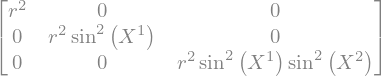

In [26]:
g

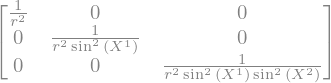

In [27]:
g_inv

In [28]:
## Convert coordinates from tuple to list ##
X_array = []
for i in range(dim):
    X_array.append(X[i])

print_Christoffel()

\begin{align*} 
\Gamma^1_{11} =& \:0\\ 
\Gamma^1_{12} =& \:0\\ 
\Gamma^1_{13} =& \:0\\ 
\Gamma^1_{21} =& \:0\\ 
\Gamma^1_{22} =& \:- \frac{\sin{\left(2 X^{1} \right)}}{2}\\ 
\Gamma^1_{23} =& \:0\\ 
\Gamma^1_{31} =& \:0\\ 
\Gamma^1_{32} =& \:0\\ 
\Gamma^1_{33} =& \:- \sin{\left(X^{1} \right)} \sin^{2}{\left(X^{2} \right)} \cos{\left(X^{1} \right)}\\ 
\Gamma^2_{11} =& \:0\\ 
\Gamma^2_{12} =& \:\frac{1}{\tan{\left(X^{1} \right)}}\\ 
\Gamma^2_{13} =& \:0\\ 
\Gamma^2_{21} =& \:\frac{1}{\tan{\left(X^{1} \right)}}\\ 
\Gamma^2_{22} =& \:0\\ 
\Gamma^2_{23} =& \:0\\ 
\Gamma^2_{31} =& \:0\\ 
\Gamma^2_{32} =& \:0\\ 
\Gamma^2_{33} =& \:- \frac{\sin{\left(2 X^{2} \right)}}{2}\\ 
\Gamma^3_{11} =& \:0\\ 
\Gamma^3_{12} =& \:0\\ 
\Gamma^3_{13} =& \:\frac{1}{\tan{\left(X^{1} \right)}}\\ 
\Gamma^3_{21} =& \:0\\ 
\Gamma^3_{22} =& \:0\\ 
\Gamma^3_{23} =& \:\frac{1}{\tan{\left(X^{2} \right)}}\\ 
\Gamma^3_{31} =& \:\frac{1}{\tan{\left(X^{1} \right)}}\\ 
\Gamma^3_{32} =& \:\frac{1}{\tan{\left(X^{2} \right)}}\\ 
\Gamma^3_{33} =& \:0\\ 
\end{align*}

In [29]:
print_Riemann()

\begin{align*} 
R^1_{111} =& \:0\\ 
R^1_{112} =& \:0\\ 
R^1_{113} =& \:0\\ 
R^1_{121} =& \:0\\ 
R^1_{122} =& \:0\\ 
R^1_{123} =& \:0\\ 
R^1_{131} =& \:0\\ 
R^1_{132} =& \:0\\ 
R^1_{133} =& \:0\\ 
R^1_{211} =& \:0\\ 
R^1_{212} =& \:\sin^{2}{\left(X^{1} \right)}\\ 
R^1_{213} =& \:0\\ 
R^1_{221} =& \:- \sin^{2}{\left(X^{1} \right)}\\ 
R^1_{222} =& \:0\\ 
R^1_{223} =& \:0\\ 
R^1_{231} =& \:0\\ 
R^1_{232} =& \:0\\ 
R^1_{233} =& \:0\\ 
R^1_{311} =& \:0\\ 
R^1_{312} =& \:0\\ 
R^1_{313} =& \:\sin^{2}{\left(X^{1} \right)} \sin^{2}{\left(X^{2} \right)}\\ 
R^1_{321} =& \:0\\ 
R^1_{322} =& \:0\\ 
R^1_{323} =& \:0\\ 
R^1_{331} =& \:- \sin^{2}{\left(X^{1} \right)} \sin^{2}{\left(X^{2} \right)}\\ 
R^1_{332} =& \:0\\ 
R^1_{333} =& \:0\\ 
R^2_{111} =& \:0\\ 
R^2_{112} =& \:-1\\ 
R^2_{113} =& \:0\\ 
R^2_{121} =& \:1\\ 
R^2_{122} =& \:0\\ 
R^2_{123} =& \:0\\ 
R^2_{131} =& \:0\\ 
R^2_{132} =& \:0\\ 
R^2_{133} =& \:0\\ 
R^2_{211} =& \:0\\ 
R^2_{212} =& \:0\\ 
R^2_{213} =& \:0\\ 
R^2_{221} =& \:0\\ 
R^2_{222} =& \:0\\ 
R^2_{223} =& \:0\\ 
R^2_{231} =& \:0\\ 
R^2_{232} =& \:0\\ 
R^2_{233} =& \:0\\ 
R^2_{311} =& \:0\\ 
R^2_{312} =& \:0\\ 
R^2_{313} =& \:0\\ 
R^2_{321} =& \:0\\ 
R^2_{322} =& \:0\\ 
R^2_{323} =& \:\sin^{2}{\left(X^{1} \right)} \sin^{2}{\left(X^{2} \right)}\\ 
R^2_{331} =& \:0\\ 
R^2_{332} =& \:- \sin^{2}{\left(X^{1} \right)} \sin^{2}{\left(X^{2} \right)}\\ 
R^2_{333} =& \:0\\ 
R^3_{111} =& \:0\\ 
R^3_{112} =& \:0\\ 
R^3_{113} =& \:-1\\ 
R^3_{121} =& \:0\\ 
R^3_{122} =& \:0\\ 
R^3_{123} =& \:0\\ 
R^3_{131} =& \:1\\ 
R^3_{132} =& \:0\\ 
R^3_{133} =& \:0\\ 
R^3_{211} =& \:0\\ 
R^3_{212} =& \:0\\ 
R^3_{213} =& \:0\\ 
R^3_{221} =& \:0\\ 
R^3_{222} =& \:0\\ 
R^3_{223} =& \:- \sin^{2}{\left(X^{1} \right)}\\ 
R^3_{231} =& \:0\\ 
R^3_{232} =& \:\sin^{2}{\left(X^{1} \right)}\\ 
R^3_{233} =& \:0\\ 
R^3_{311} =& \:0\\ 
R^3_{312} =& \:0\\ 
R^3_{313} =& \:0\\ 
R^3_{321} =& \:0\\ 
R^3_{322} =& \:0\\ 
R^3_{323} =& \:0\\ 
R^3_{331} =& \:0\\ 
R^3_{332} =& \:0\\ 
R^3_{333} =& \:0\\ 
\end{align*}

In [30]:
print_Ricci()

\begin{align*} 
R_{11} =& \:2\\ 
R_{12} =& \:0\\ 
R_{13} =& \:0\\ 
R_{21} =& \:0\\ 
R_{22} =& \:2 \sin^{2}{\left(X^{1} \right)}\\ 
R_{23} =& \:0\\ 
R_{31} =& \:0\\ 
R_{32} =& \:0\\ 
R_{33} =& \:2 \sin^{2}{\left(X^{1} \right)} \sin^{2}{\left(X^{2} \right)}\\ 
\end{align*}

In [31]:
print_Ricci_Scalar()

\begin{align*} 
R=& \:\frac{6}{r^{2}}\\ 
\end{align*}

In [32]:
print_Einstein()

\begin{align*} 
G_{11} =& \:-1\\ 
G_{12} =& \:0\\ 
G_{13} =& \:0\\ 
G_{21} =& \:0\\ 
G_{22} =& \:- \sin^{2}{\left(X^{1} \right)}\\ 
G_{23} =& \:0\\ 
G_{31} =& \:0\\ 
G_{32} =& \:0\\ 
G_{33} =& \:- \sin^{2}{\left(X^{1} \right)} \sin^{2}{\left(X^{2} \right)}\\ 
\end{align*}

<div class="alert alert-block alert-success">
    
Example ends here.

[Return to the top](#content)

## Jacobian Matrix

We decided to also create a calculator of Jacobina matrix components as this may be useful for revision as well. Jacobian matrix can calcualte the components of the new coordinate system $Y^i$ as a function of the old coordinate system $X^i$ (e.g. $Y^1 = Y^1 \left(X^1, X^2, X^3, ..., X^N\right)$ where $N$ is the number of dimensions of the $X^i$ coodinate system).

To find vector in the terms of the new coordinate system, we can use the equation $V_{\left(Y\right)}^i = \frac{\partial Y^i}{\partial X^j} V_{\left(X\right)}^j$. The factors of partial derivative are components of Jacobian matrix and hence, can be expressed as $J_{j}^{i} \equiv \frac{\partial Y^i}{\partial X^j}$.

In [33]:
# Define the dimensionality of the coordinate systems
dim = 3

# Define the coordinate systems
X = symbols(' '.join([fr'X^{i+1}' for i in range(dim)]))
Y = symbols(' '.join([fr'Y^{i+1}' for i in range(dim)]))

# Define the transformation equations
# Here, we assume that the transformation equations are given as a list of symbolic expressions
transformations = [
    X[0] * sin(X[1]) * cos(X[2]),
    X[0] * sin(X[1]) * sin(X[2]),
    X[0] * cos(X[1])
]

In [34]:
def Jacobian(i,j):
    Jacobian = diff(transformations[j], X[i])
    return Jacobian


In [35]:
def print_Jacobian(simple = True):
    ## Front part of the LaTeX align string ##
    string = ''
    frontstring = '\\begin{align*} \n'
    string += frontstring
    
    ## Equations for the components ##
    for i in range(dim):
        for j in range(dim):
            if simple == True:
                string += fr'J_{j+1}^{i+1} =& \:' + sp.latex(simplify(nsimplify(Jacobian(i, j)))) + '\\\\ \n'
            else:
                string += fr'J_{j+1}^{i+1} =& \:' + sp.latex(nsimplify(Jacobian(i, j))) + '\\\\ \n'
                
    ## Back part of the LaTeX align string ##
    backstring = '\\end{align*}'
    string += backstring
    
    ## Display equations as LaTeX in markdown ##
    display(Markdown(string))
    return

In [36]:
print_Jacobian()

\begin{align*} 
J_1^1 =& \:\sin{\left(X^{2} \right)} \cos{\left(X^{3} \right)}\\ 
J_2^1 =& \:\sin{\left(X^{2} \right)} \sin{\left(X^{3} \right)}\\ 
J_3^1 =& \:\cos{\left(X^{2} \right)}\\ 
J_1^2 =& \:X^{1} \cos{\left(X^{2} \right)} \cos{\left(X^{3} \right)}\\ 
J_2^2 =& \:X^{1} \sin{\left(X^{3} \right)} \cos{\left(X^{2} \right)}\\ 
J_3^2 =& \:- X^{1} \sin{\left(X^{2} \right)}\\ 
J_1^3 =& \:- X^{1} \sin{\left(X^{2} \right)} \sin{\left(X^{3} \right)}\\ 
J_2^3 =& \:X^{1} \sin{\left(X^{2} \right)} \cos{\left(X^{3} \right)}\\ 
J_3^3 =& \:0\\ 
\end{align*}